In [1]:
# video # 1
# decision tree classifier
%matplotlib inline
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
# in features 0 -> bumpy, 1 -> smooth , ( 140, 150 etc are the weight of the fruit
features = [[140,1], [130,1],[150,0],[170,0]]

# in labels 0 -> apple (light in weight, smooth), 1-> orange (heavier in weight , bumpy)
labels = [0,0,1,1]

In [3]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, labels)
print clf.predict([[160,0]])

# it has predicted that if a fruit is more in weight and bumpy that is likely to be an Orange

[1]


In [4]:
# video # 2
# for more information on iris dataset refer this: https://en.wikipedia.org/wiki/Iris_flower_data_set
from sklearn.datasets import load_iris
iris = load_iris()


print iris.feature_names
print iris.target_names
print iris.data[0]

# 0 -> setosa , 1 -> versicolor , 2 -> virginica
print iris.target[0]


test_idx = [0,50,100]

# training data
train_target = np.delete(iris.target, test_idx) 
train_data = np.delete(iris.data, test_idx, axis=0)


# testing data
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[ 5.1  3.5  1.4  0.2]
0


In [5]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_target)


# test the testing data now if test_target -> [0,1,2] and test_data -> [0,1,2]
print test_target
print clf.predict(test_data)

[0 1 2]
[0 1 2]


In [6]:
# viz code
from sklearn.externals.six import StringIO
import pydot

dot_data = StringIO()
tree.export_graphviz(clf, 
                    out_file=dot_data,
                    feature_names=iris.feature_names,
                    class_names=iris.target_names,
                    filled=True, rounded=True, 
                    impurity=False)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('iris.pdf')

True

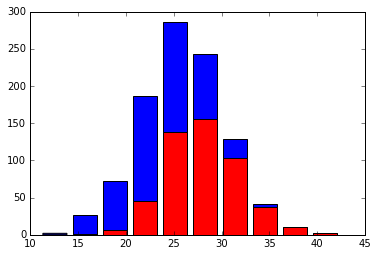

In [7]:
# What makes a good feature
# classifying whether the dog is greyhound or labrador based on the 
# features
import numpy as np
import matplotlib.pyplot as plt

greyhounds = 500
labs = 500

grey_height = 28 + 4 * np.random.randn(greyhounds)
lab_height = 24 + 4 * np.random.randn(labs)

plt.hist([grey_height, lab_height], stacked = True, color = ['r','b'])
plt.show()

In [8]:
# classifier insights learning
from sklearn import datasets
from sklearn.metrics import accuracy_score
iris = datasets.load_iris()

# features are X and labels are Y f(x) = y
X = iris.data
Y = iris.target

from sklearn.cross_validation import train_test_split
# .5 means half of the data to be used as test and half for train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size = .5) 

from sklearn import tree
# decision tree classifier
my_classifier = tree.DecisionTreeClassifier()
my_classifier.fit(X_train, Y_train)

# list of predictions made on the training data 
predictions = my_classifier.predict(X_train)

predictions = my_classifier.predict(X_test)

print accuracy_score(Y_test, predictions)


# K nearest Neighbour classifier
from sklearn.neighbors import KNeighborsClassifier
my_classifier = KNeighborsClassifier()
my_classifier.fit(X_train, Y_train)

# list of predictions made on the training data 
predictions = my_classifier.predict(X_train)

predictions = my_classifier.predict(X_test)

print accuracy_score(Y_test, predictions)

0.973333333333
0.986666666667


In [9]:
# scrappy version of knearestneighbours writing our own classifier
import random
from sklearn import datasets
from sklearn.metrics import accuracy_score
iris = datasets.load_iris()

# features are X and labels are Y f(x) = y
X = iris.data
Y = iris.target

from sklearn.cross_validation import train_test_split
# .5 means half of the data to be used as test and half for train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size = .5) 

from sklearn import tree
# decision tree classifier
my_classifier = tree.DecisionTreeClassifier()
my_classifier.fit(X_train, Y_train)

# list of predictions made on the training data 
predictions = my_classifier.predict(X_train)

predictions = my_classifier.predict(X_test)

print accuracy_score(Y_test, predictions)

from scipy.spatial import distance 


def euc(a,b):
    return distance.euclidean(a,b)
    

class ScrappyKNN():
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = self.closest(row)
            predictions.append(label)
        return predictions
    
    def closest(self, row):
        best_dist = euc(row, self.X_train[0])
        best_index = 0
        for i in range(1, len(self.X_train)):
            dist = euc(row, self.X_train[i])
            if dist < best_dist:
                best_dist = dist
                best_index = i
                
        return self.y_train[best_index]
        

# K nearest Neighbour classifier
#from sklearn.neighbors import KNeighborsClassifier
my_classifier = ScrappyKNN()
my_classifier.fit(X_train, Y_train)

# list of predictions made on the training data 
predictions = my_classifier.predict(X_train)

predictions = my_classifier.predict(X_test)

print accuracy_score(Y_test, predictions)

0.946666666667
0.96


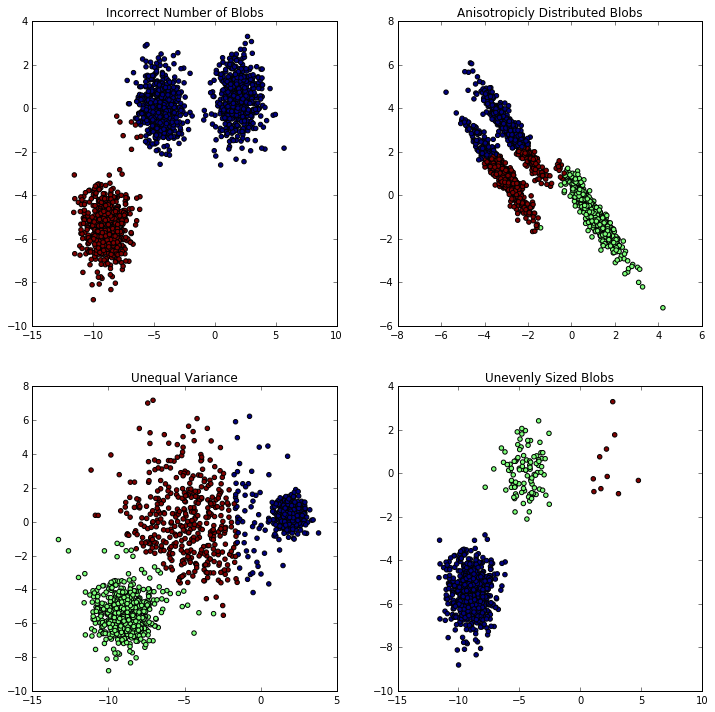

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

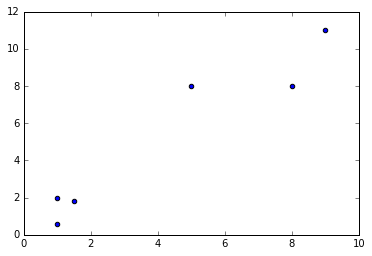

In [11]:
# youtube clustering examples
X = [1, 5, 1.5, 8, 1, 9]
Y = [2, 8, 1.8, 8, 0.6, 11]
plt.scatter(X,Y)
plt.show()


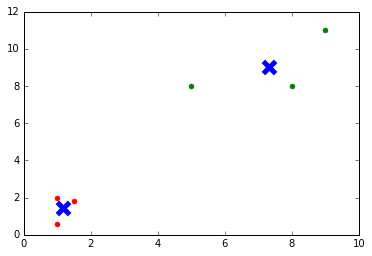

In [13]:
# creating np array as explained from the above X and Y list of (X,Y) cordinates
# marking the center points in our cluster
X = np.array([
         [1,2],
         [5,8],
         [1.5,1.8],
         [8,8],
         [1,0.6],
         [9,11]
        ])

pred = KMeans(n_clusters = 2)
pred.fit(X)
centroids = pred.cluster_centers_
labels = pred.labels_
colors = ["g.","r."]
for i in range(len(X)):
   plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x" , s=150, linewidths=5, zorder= 10)
plt.show()